# Clima Change Prediction Using Machine Learning


Lets Use a Linear and Logistic regression to predict the future points. After that, we will include a MLP model. We need to compte all score in a table and select the best strategy to be used in the production phase.

In [1]:
# Import evething here

import pandas as pd
import numpy as np
import keras.backend as K
import matplotlib.pyplot as plt 
import warnings
import statsmodels.formula.api as smf # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from dateutil.parser import parse
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import *
from keras.callbacks import EarlyStopping,ModelCheckpoint
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler


warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Use this to hold the information for each strategy
summary = {}

Using TensorFlow backend.


            Unnamed: 0   Source    Mean
Date                                   
1880-01-01        3287  GISTEMP -0.3000
1880-01-01        3286     GCAG  0.0009
1880-02-01        3285  GISTEMP -0.2100
1880-02-01        3284     GCAG -0.1229
1880-03-01        3283  GISTEMP -0.1800
Date
1880-01-01   -0.3000
1880-01-01    0.0009
1880-02-01   -0.2100
1880-02-01   -0.1229
1880-03-01   -0.1800
Name: Mean, dtype: float64


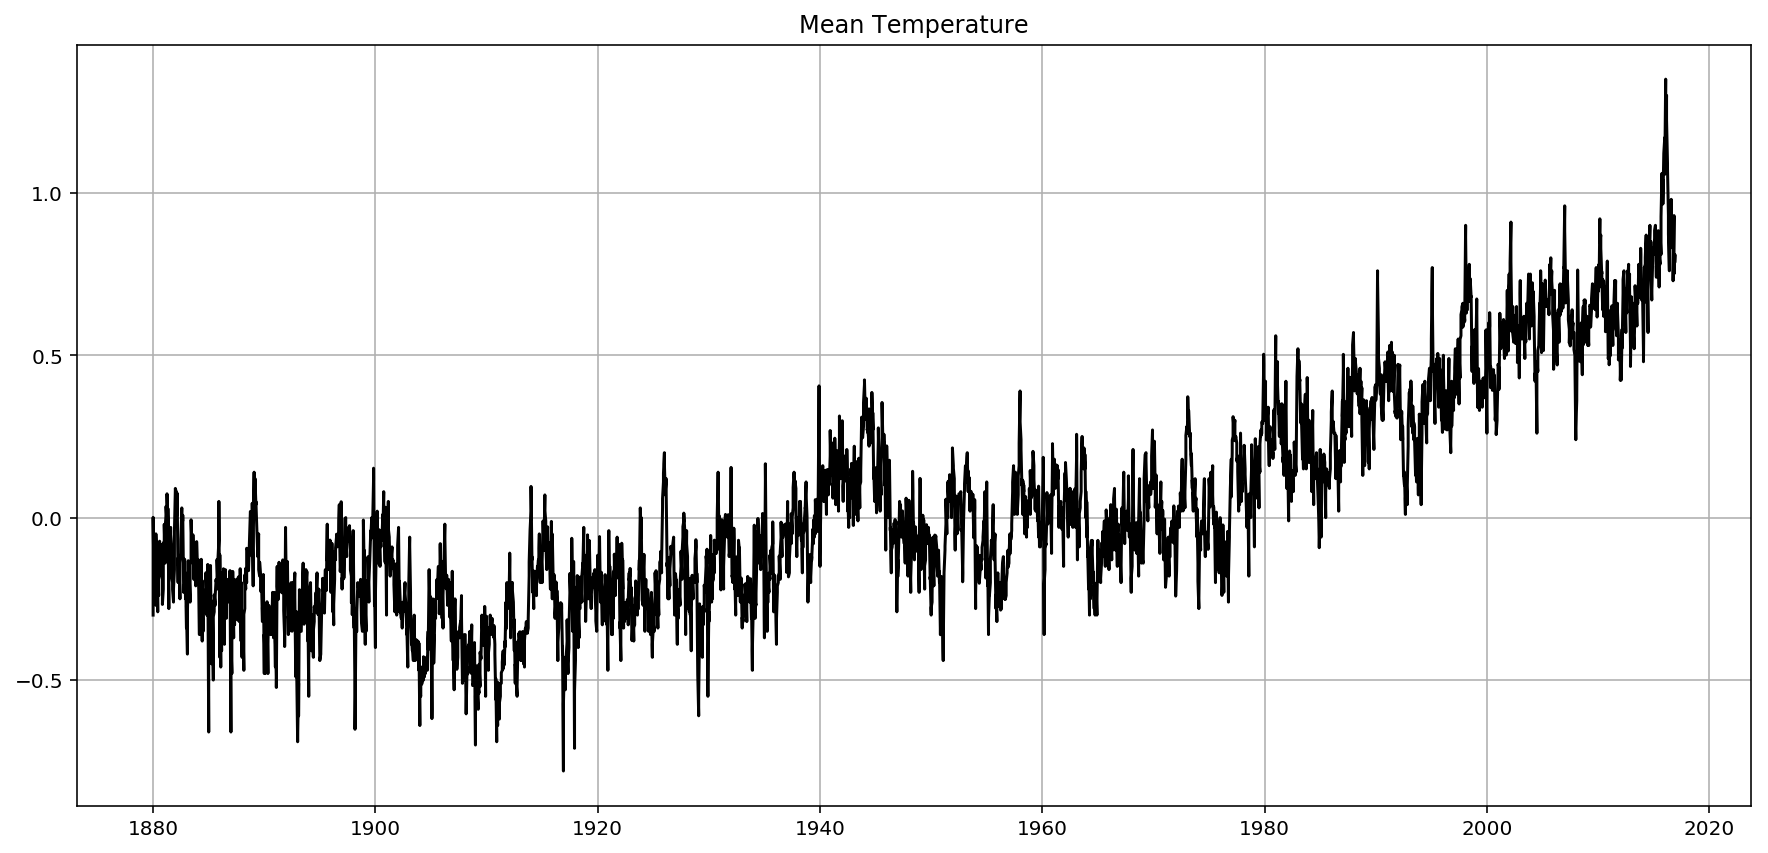

In [5]:
data = pd.read_csv('samples/ClimateChange_MonthlyStart.csv', index_col=['Date'], parse_dates=['Date'])
#data["Date"] = pd.to_datetime(data["Date"])
#data = data.set_index(["Date"], drop=True)
#data = data.sort_index(axis=1 ,ascending=True)
data = data.iloc[::-1]
print(data.head())

series = data.Mean
print(series.head())
plt.figure(figsize=(15, 7))
plt.plot(series, 'k')
plt.title('Mean Temperature')
plt.grid(True)
plt.show()